<a href="https://colab.research.google.com/github/PrathamUdayG/Machine_Learning_Algorithms_Project/blob/main/ADABoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Breast Cancer Wisconsin**

In [51]:
import pandas as pd
import numpy as np

In [52]:
df = pd.read_csv("/content/data.csv")
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [53]:
df.shape

(569, 33)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [55]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [56]:
df['diagnosis'].nunique()

2

In [57]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [58]:
df.drop(columns = ['Unnamed: 32','id'],inplace=True)

In [59]:
df.duplicated().sum()

np.int64(0)

In [60]:
# Map this column diagnosis
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [61]:
df.skew()

,0
diagnosis,0.528461
radius_mean,0.942380
texture_mean,0.650450
perimeter_mean,0.990650
area_mean,1.645732
smoothness_mean,0.456324
compactness_mean,1.190123
concavity_mean,1.401180
concave points_mean,1.171180
symmetry_mean,0.725609


In [62]:
X = df.drop(columns='diagnosis')
y = df['diagnosis']

In [63]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [64]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_model = DecisionTreeClassifier(
    max_depth = 1,
    random_state = 42
)

ada = AdaBoostClassifier(
    estimator = base_model,
    n_estimators = 100,
    learning_rate = 0.1,
    random_state = 42
)
ada.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   learning_rate=0.1, n_estimators=100, random_state=42)

In [66]:
from sklearn.metrics import classification_report , roc_auc_score

y_pred = ada.predict(X_test)
y_prob = ada.predict_proba(X_test)[:,1]

print("classification_report",classification_report(y_test,y_pred))
print("ROC-AUC",roc_auc_score(y_test,y_prob))

classification_report               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

ROC-AUC 0.994378306878307


In [73]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

print("ROC-AUC:", auc_score)

ROC-AUC: 0.994378306878307


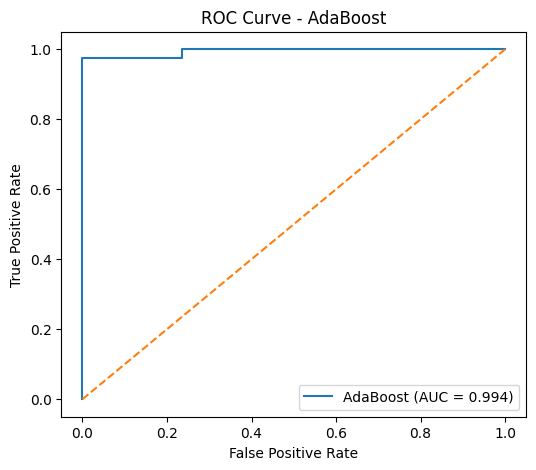

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AdaBoost (AUC = {auc_score:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")  # random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - AdaBoost")
plt.legend()
plt.show()

In [71]:
from sklearn.metrics import accuracy_score

# Train accuracy
y_train_pred = ada.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

# Test (validation) accuracy
y_test_pred = ada.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print("Training Accuracy :", train_acc)
print("Validation Accuracy:", test_acc)

Training Accuracy : 0.9824175824175824
Validation Accuracy: 0.9649122807017544
